<h1><u>YCBS 255 - Assignment 3</u></h1>
<h3>Date: April 24th, 2018</h3>
<h3>Professor: Dr. Vahid Partovi Nia</h3>
<h3>Student: Martin Talbot</h3>

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.


In [344]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

os.chdir('/Users/talbotm/Documents/McGill/')

train = np.loadtxt('data/ziptrain.csv')
test = np.loadtxt('data/ziptest.csv')
print(train.shape, test.shape)

(7291, 257) (2007, 257)


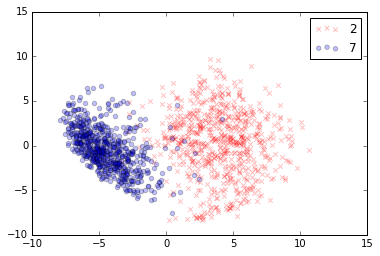

In [345]:
train_2 = train[train[:,0]==2 ]
train_7 = train[train[:,0] == 7]
train_2_7 = np.vstack([train_2, train_7])

pca = PCA(n_components = 2)
pca.fit(train_2_7[:, 1:])
Z = pca.transform(train_2_7[:,1:])
plt.scatter(Z[:,0][train_2_7[:,0]==2], Z[:,1][train_2_7[:,0]==2], c='red', marker = 'x', alpha = 0.25);
plt.scatter(Z[:,0][train_2_7[:,0]==7], Z[:,1][train_2_7[:,0]==7], c = 'blue', marker = 'o', alpha = 0.25);
plt.legend([2,7]);

### Answer: Yes the two digits seem linearly separable

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.


------------------ LR on test data -------------------
Accuracy = 	0.9652
Precision = 	0.9697
Sensitivity = 	0.9697
Specificity = 	0.9592
F1-score bin = 	0.9697
AUC score = 	0.9930


          Predicted 0  Predicted 1
Actual 0          141            6
Actual 1            6          192


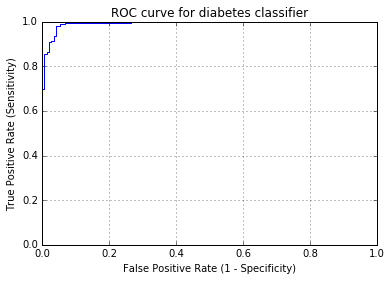

In [346]:
def confusion_metrics(y, y_pred, y_prob, print_ = True):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(y, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    if(print_ == True):
        print("Accuracy = \t{:1.4f}".format((TP + TN) / float(TP + TN + FP + FN)))
        print("Precision = \t{:1.4f}".format(TP / float(TP + FP)))
        print("Sensitivity = \t{:1.4f}".format(TP / float(TP + FN)))
        print("Specificity = \t{:1.4f}".format(TN / float(TN + FP)))
        print("F1-score bin = \t{:1.4f}".format(metrics.f1_score(y, y_pred, average='binary')))
        print("AUC score = \t{:1.4f}".format(metrics.roc_auc_score(y, y_prob)))
        print("\n")
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True);
    return pd.DataFrame(confusion, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])


m = 2
pca = PCA(n_components = m)
pca.fit(train_2_7[:, 1:])
pca.fit(train_2_7[:, 1:])
Z_train = pca.transform(train_2_7[:,1:])
is_2_train = (train_2_7[:,0]==2).astype(int)

lr = LogisticRegression()
lr.fit(Z_train, is_2_train)

pca.fit(test_2_7[:, 1:])
pca.fit(test_2_7[:, 1:])
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0]==2).astype(int)

lr.predict(Z_test)

print("\n------------------ LR on test data -------------------")
print(confusion_metrics(is_2_test, lr.fit(Z_test, is_2_test).predict(Z_test), lr.predict_proba(Z_test)[:,1]))


### Yes the model works well on the test data. I get high accuracy, precision, sensitivity, F1-Score and AUC.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

In [347]:
nb_digits = train[:,0].shape[0]
m = 256
pca = PCA(n_components = m)
pca.fit(test_2_7[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

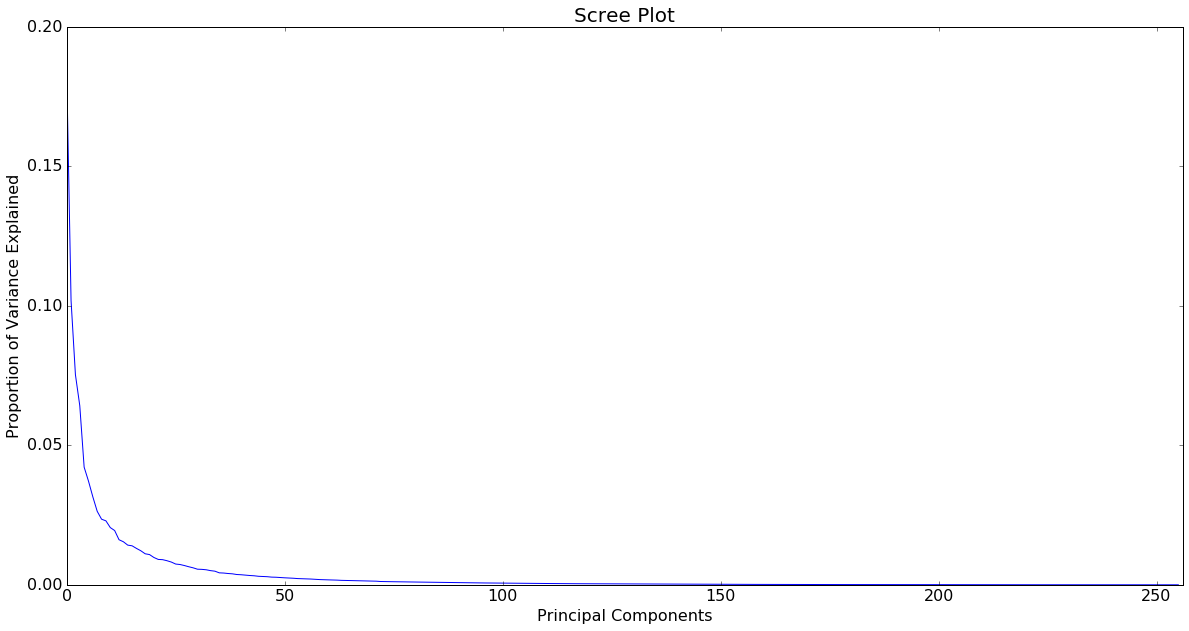

In [348]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(pca.explained_variance_/np.sum(pca.explained_variance_) )
ax.set_xlabel('Principal Components', size=16)
ax.set_ylabel('Proportion of Variance Explained',size=16)
ax.set_xlim([0, m])
ax.set_title('Scree Plot',size=20)
ax.tick_params(labelsize=16)


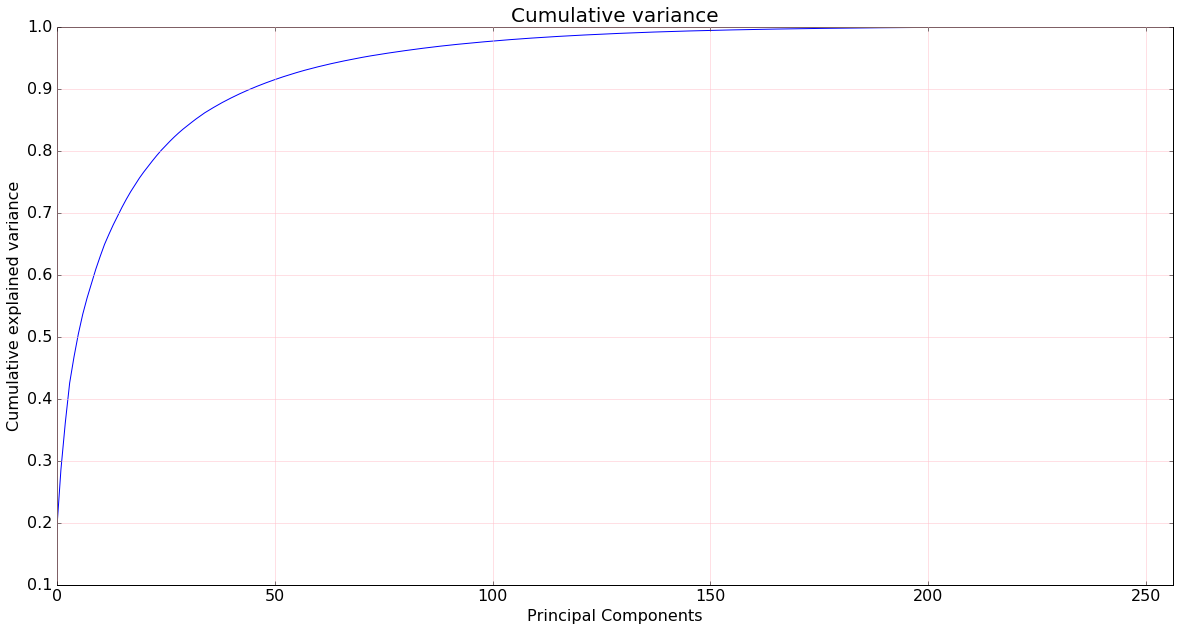

In [349]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(cumul)
ax.set_xlabel('Principal Components', size=16)
ax.set_ylabel('Cumulative explained variance',size=16)
ax.set_xlim([0, m])
ax.set_title('Cumulative variance', size=20)
ax.grid(color='pink', linestyle='-', linewidth=0.5)
ax.tick_params(labelsize=16)


------------------ LR on test data -------------------
Accuracy = 	1.0000
Precision = 	1.0000
Sensitivity = 	1.0000
Specificity = 	1.0000
F1-score bin = 	1.0000
AUC score = 	1.0000


          Predicted 0  Predicted 1
Actual 0          147            0
Actual 1            0          198


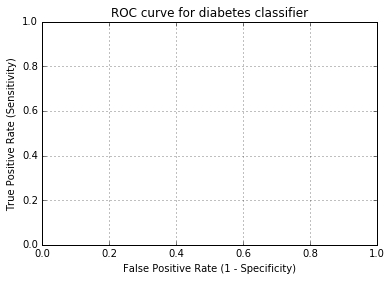

In [350]:
m = 29
pca = PCA(n_components = m)
pca.fit(train_2_7[:, 1:])
pca.fit(train_2_7[:, 1:])
Z_train = pca.transform(train_2_7[:,1:])
is_2_train = (train_2_7[:,0]==2).astype(int)

lr = LogisticRegression()
lr.fit(Z_train, is_2_train)

pca.fit(test_2_7[:, 1:])
pca.fit(test_2_7[:, 1:])
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0]==2).astype(int)

lr.predict(Z_test)

print("\n------------------ LR on test data -------------------")
print(confusion_metrics(is_2_test, lr.fit(Z_test, is_2_test).predict(Z_test), lr.predict_proba(Z_test)[:,1]))

### Answer: It seems that m=29 is the lowest number of dimensions need in order to get perfect classification metric scores

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


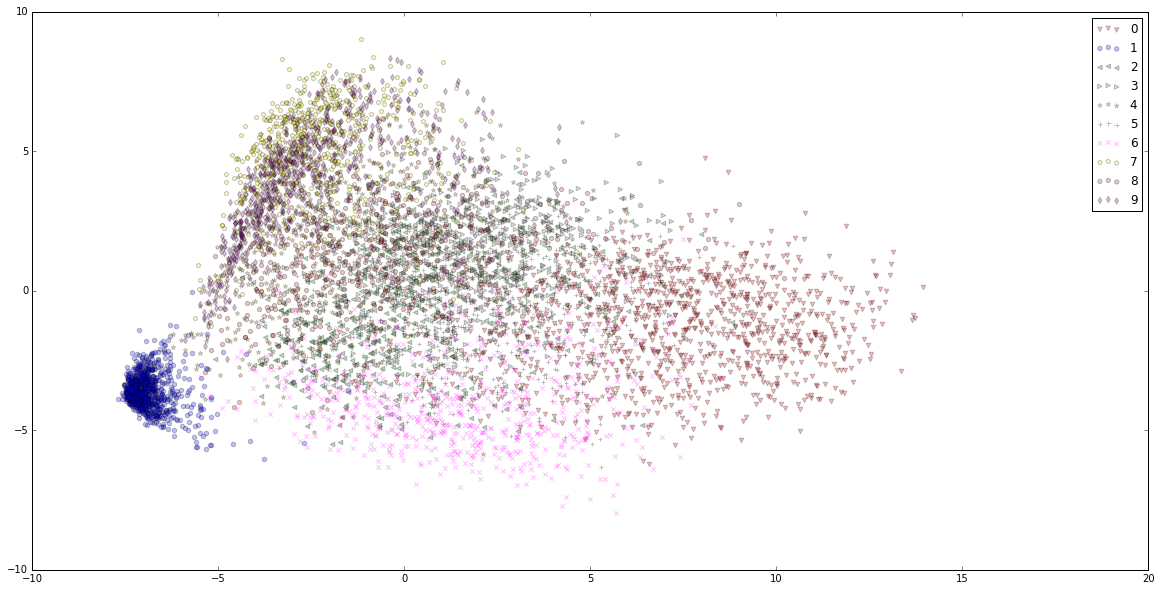

In [351]:
pca = PCA(n_components = 2)
pca.fit(train[:, 1:])
Z_train = pca.transform(train[:,1:])
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Z_train[:,0][train[:,0]==0], Z_train[:,1][train[:,0]==0], c='red', marker = 'v', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==1], Z_train[:,1][train[:,0]==1], c = 'blue', marker = 'o', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==2], Z_train[:,1][train[:,0]==2], c='green', marker = '<', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==3], Z_train[:,1][train[:,0]==3], c = 'gray', marker = '>', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==4], Z_train[:,1][train[:,0]==4], c='orange', marker = '*', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==5], Z_train[:,1][train[:,0]==5], c = 'black', marker = '+', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==6], Z_train[:,1][train[:,0]==6], c='magenta', marker = 'x', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==7], Z_train[:,1][train[:,0]==7], c = 'yellow', marker = 'p', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==8], Z_train[:,1][train[:,0]==8], c='brown', marker = '8', alpha = 0.25);
ax.scatter(Z_train[:,0][train[:,0]==9], Z_train[:,1][train[:,0]==9], c = 'purple', marker = 'd', alpha = 0.25);
ax.legend([0,1,2,3,4,5,6,7,8,9]);

### Answer: No, two principal components cannot separate all digits properly. In contrast, 1's could be distinguished well, and 0's quite well.


------------------ LR on test data on value 0 -------------------
          Predicted 0  Predicted 1
Actual 0         5826          271
Actual 1          297          897

------------------ LR on test data on value 1 -------------------
          Predicted 0  Predicted 1
Actual 0         6192           94
Actual 1            4         1001

------------------ LR on test data on value 2 -------------------
          Predicted 0  Predicted 1
Actual 0         6560            0
Actual 1          731            0

------------------ LR on test data on value 3 -------------------
          Predicted 0  Predicted 1
Actual 0         6633            0
Actual 1          658            0

------------------ LR on test data on value 4 -------------------
          Predicted 0  Predicted 1
Actual 0         6639            0
Actual 1          652            0

------------------ LR on test data on value 5 -------------------
          Predicted 0  Predicted 1
Actual 0         6735            0
Act

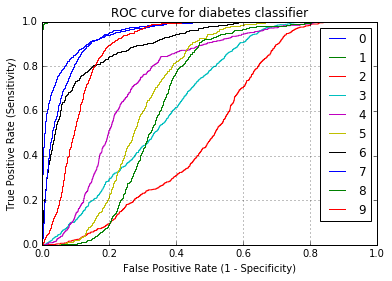

In [354]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis()
ld.fit(Z_train, train[:,0])

# making current value 1 and all the rest 0, which I need to plot 10 confusion matrices
for i in range(0,10):
    is_v_train = (train[:,0]==i).astype(int)
    print("\n------------------ LR on test data on value {} -------------------".format(i))
    print(confusion_metrics(is_v_train, ld.fit(Z_train, is_v_train).predict(Z_train), \
                            ld.predict_proba(Z_train)[:,1], print_ = False));  
plt.legend(list(range(0,10)));

### We see the poor performance of two principal components. As indicated above, 1 performs best. In contrast, 9 performs poorly.

In [317]:
m = 29
pca = PCA(n_components = m)
pca.fit(train[:, 1:])
pca.fit(train[:, 1:])
Z_train = pca.transform(train[:,1:])

is_2_train = (train_2_7[:,0]==2).astype(int)

lr = LogisticRegression()
lr.fit(Z_train, is_2_train)

pca.fit(test_2_7[:, 1:])
pca.fit(test_2_7[:, 1:])
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0]==2).astype(int)

lr.predict(Z_test)

print("\n------------------ LR on test data -------------------")
print(confusion_metrics(is_2_test, lr.fit(Z_test, is_2_test).predict(Z_test), lr.predict_proba(Z_test)[:,1]))

array([ 6.,  9.,  2.,  5.,  6.,  6.,  3.,  2.,  1.,  4.,  2.,  2.,  5.,
        6.,  8.,  6.,  6.,  2.,  2.,  2.,  5.,  2.,  2.,  5.,  2.,  2.,
        1.,  2.,  6.,  2.,  2.,  6.,  3.,  3.,  2.,  6.,  6.,  6.,  3.,
        1.,  6.,  2.,  0.,  3.,  2.,  6.,  5.,  6.,  3.,  6.,  2.,  2.,
        3.,  6.,  2.,  4.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  6.,  2.,
        2.,  2.,  3.,  2.,  2.,  3.,  6.,  3.,  6.,  3.,  6.,  4.,  2.,
        2.,  0.,  0.,  0.,  2.,  5.,  2.,  2.,  3.,  2.,  2.,  2.,  3.,
        6.,  2.,  3.,  4.,  3.,  3.,  6.,  6.,  3.,  2.,  6.,  2.,  5.,
        5.,  1.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  6.,
        6.,  6.,  3.,  1.,  2.,  3.,  6.,  2.,  1.,  6.,  3.,  1.,  2.,
        2.,  5.,  2.,  2.,  2.,  3.,  8.,  2.,  2.,  2.,  2.,  0.,  3.,
        1.,  2.,  0.,  4.,  8.,  6.,  3.,  5.,  3.,  6.,  8.,  4.,  0.,
        0.,  3.,  2.,  6.,  2.,  9.,  2.,  2.,  8.,  2.,  4.,  4.,  2.,
        2.,  2.,  6.,  2.,  2.,  4.,  3.,  2.,  2.,  4.,  2.,  2

In [ ]:
# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded